# Índice - Rede Neural Didática

[Testes da Implementação](#Testes-da-Implementação)

- [Exemplos da Rede Empírica](#Exemplos-da-Rede-Empírica)

- [Regressão](#Regressão)
    - [Regressão Linear Simples](#Regressão-Linear-Simples---Exemplo-do-Perceptron)
    - [Regressão Linear Multivariada](#Regressão-Linear-Multivariada---Exerc%C3%ADcio-de-Regressão-do-Perceptron)
    - [Regressão Quadrática](#Regressão-Quadrática)
    - [Regressão Cúbica](#Regressão-Cúbica)
    - [Regressão Logarítimica](#Regressão-Logar%C3%ADtimica)
    - [Regressão Exponencial](#Regressão-Exponencial)
    - [Early Stopping DEMO](#Early-Stopping-DEMO)

- [Classificação Binária](#Classificação-Binária)
    - [Porta AND/OR](#Porta-AND/OR)
    - [Porta XOR](#Porta-XOR)
    - [2 Clusters](#2-Clusters)
    - [4 Clusters](#4-Clusters)
    - [Círculos](#C%C3%ADrculos)
    - [Moons](#Moons)
    - [Espiral](#Espiral)
    - [Mapa Suscetibilidade POA](#Mapa-Suscetibilidade-POA)
    
- [Classificação Multiclasse](#Classificação-Multiclasse)
    - [3 Clusters Multiclasse](#3-Clusters-Multiclasse)
    - [4 Clusters Multiclasse](#4-Clusters-Multiclasse)
    - [Espiral - 5 Classes](#Espiral---5-Classes)
    - [Make Classification - 4 Classes](#Make-Classification---4-Classes)
    - [Iris Dataset](#Iris-Dataset)

[Referências](#Referências)

# Imports and Configurações

In [1]:
import Rede_Neural as rna
from Rede_Neural import NeuralNetwork
from Rede_Neural import Layer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs, make_circles, make_moons, make_classification

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from utils.samples_generator import make_spiral, make_square, make_cubic, make_exp, make_log10
from utils import plot



%matplotlib inline

## Exemplos da Rede Empírica

### Exemplo 1

In [2]:
x = np.array([[0.05, 0.10]])
y = np.array([[0.01, 0.99]])

w1 = np.array([[0.15, 0.20], [0.25, 0.30]])
b1 = np.array([[0.35]]) 
w2 = np.array([[0.40, 0.45], [0.50, 0.55]])
b2 = np.array([[0.60]])

# Configuração da rede aqui..
input_dim, output_dim = x.shape[1], y.shape[1] #numero de colunas da entrada e saida
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 0.5)
nn.layers.append(Layer(input_dim=input_dim, output_dim=2,activation=rna.sigmoid)) #a saida de uma camada é a entrada da próxima (2 nesse caso)
nn.layers.append(Layer(input_dim=2, output_dim=output_dim,activation=rna.sigmoid))

#normalmente são numeros aleatórios, mas para fins didáticos
nn.layers[0].weights = w1
nn.layers[0].biases = b1
nn.layers[1].weights = w2
nn.layers[1].biases = b2

nn.fit(x,y, epochs=0,verbose=1)

for layer in nn.layers:
    print(layer.weights)
    
print("Trainable == False")    
#for layer in nn.layers:
for layer in nn.layers[:-1]: #congela todas as camadas menos a ultima
    layer.is_trainable = False
    
nn.fit(x, y, epochs=1000, verbose=100)    
for layer in nn.layers:
    print(layer.weights)

epoch:    0/0 loss_train: 0.14023572 + 0.00000000 = 0.14023572 loss_val = 0.14023572
[[0.14978072 0.19956143]
 [0.24975114 0.29950229]]
[[0.35891648 0.40866619]
 [0.51130127 0.56137012]]
Trainable == False
epoch:    0/1000 loss_train: 0.13098517 + 0.00000000 = 0.13098517 loss_val = 0.13098517
epoch:  100/1000 loss_train: 0.00326789 + 0.00000000 = 0.00326789 loss_val = 0.00326789
epoch:  200/1000 loss_train: 0.00142285 + 0.00000000 = 0.00142285 loss_val = 0.00142285
epoch:  300/1000 loss_train: 0.00086728 + 0.00000000 = 0.00086728 loss_val = 0.00086728
epoch:  400/1000 loss_train: 0.00060653 + 0.00000000 = 0.00060653 loss_val = 0.00060653
epoch:  500/1000 loss_train: 0.00045743 + 0.00000000 = 0.00045743 loss_val = 0.00045743
epoch:  600/1000 loss_train: 0.00036192 + 0.00000000 = 0.00036192 loss_val = 0.00036192
epoch:  700/1000 loss_train: 0.00029601 + 0.00000000 = 0.00029601 loss_val = 0.00029601
epoch:  800/1000 loss_train: 0.00024808 + 0.00000000 = 0.00024808 loss_val = 0.00024808
ep

### Exemplo 2

In [3]:
x = np.array([[0.1, 0.2, 0.7]])
y = np.array([[1, 0, 0]])
D_in, D_out = x.shape[1], y.shape[1]

w1 = np.array([[0.1, 0.2, 0.3], [0.3, 0.2, 0.7], [0.4, 0.3, 0.9]])
b1 = np.ones((1,3))
w2 = np.array([[0.2, 0.3, 0.5], [0.3, 0.5, 0.7], [0.6, 0.4, 0.8]])
b2 = np.ones((1,3))
w3 = np.array([[0.1, 0.4, 0.8], [0.3, 0.7, 0.2], [0.5, 0.2, 0.9]])
b3 = np.ones((1,3))

# Configuração da rede aqui..
D_in, D_out = x.shape[1], y.shape[1] #numero de colunas da entrada e saida
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 0.01)
nn.layers.append(Layer(input_dim=D_in, output_dim=3,activation=rna.relu)) #a saida de uma camada é a entrada da próxima (2 nesse caso)
nn.layers.append(Layer(input_dim=3, output_dim=3,activation=rna.sigmoid))
nn.layers.append(Layer(input_dim=3, output_dim=D_out,activation=rna.linear))

for i,w,b in zip(range(3), [w1,w2,w3], [b1,b2,b3]):
    nn.layers[i].weights = w
    nn.layers[i].biases = b
    
nn.fit(x, y, epochs=300, verbose=30)

for layer in nn.layers:
    print(layer.weights)


epoch:    0/300 loss_train: 1.14054966 + 0.00000000 = 1.14054966 loss_val = 1.14054966
epoch:   30/300 loss_train: 0.59630022 + 0.00000000 = 0.59630022 loss_val = 0.59630022
epoch:   60/300 loss_train: 0.36031189 + 0.00000000 = 0.36031189 loss_val = 0.36031189
epoch:   90/300 loss_train: 0.24668884 + 0.00000000 = 0.24668884 loss_val = 0.24668884
epoch:  120/300 loss_train: 0.18386202 + 0.00000000 = 0.18386202 loss_val = 0.18386202
epoch:  150/300 loss_train: 0.14510157 + 0.00000000 = 0.14510157 loss_val = 0.14510157
epoch:  180/300 loss_train: 0.11918285 + 0.00000000 = 0.11918285 loss_val = 0.11918285
epoch:  210/300 loss_train: 0.10078511 + 0.00000000 = 0.10078511 loss_val = 0.10078511
epoch:  240/300 loss_train: 0.08712037 + 0.00000000 = 0.08712037 loss_val = 0.08712037
epoch:  270/300 loss_train: 0.07660623 + 0.00000000 = 0.07660623 loss_val = 0.07660623
epoch:  300/300 loss_train: 0.06828531 + 0.00000000 = 0.06828531 loss_val = 0.06828531
[[0.10083595 0.2016719  0.30585165]
 [0.300

## Gradient Checking

In [4]:
np.random.seed(1234)
N, D = 100, 2 #100 amostra de 2 dimensoes
x = np.random.rand(N, D)

In [5]:
y = np.random.rand(N, 1)

#nn = NeuralNetwork(cost_func=mse, learning_rate=1e-3)
#nn.layers.append(Layer(input_dim=x.shape[1], output_dim=4, activation=relu))
#nn.layers.append(Layer(input_dim=4, output_dim=1, activation=tanh))
#nn.layers.append(Layer(input_dim=1, output_dim=2, activation=sigmoid))
#nn.layers.append(Layer(input_dim=2, output_dim=5, activation=leaky_relu))
#nn.layers.append(Layer(input_dim=5, output_dim=3, activation=elu))
#nn.layers.append(Layer(input_dim=3, output_dim=y.shape[1], activation=linear))

#nn = NeuralNetwork(cost_func=mse, learning_rate=1e-3, momentum=0.9, lr_decay_method =staircase_decay, lr_decay_rate=0.5, lr_decay_steps=10)
#nn.layers.append(Layer(input_dim=x.shape[1], output_dim=4, activation=relu, batch_norm=True))
#nn.layers.append(Layer(input_dim=4, output_dim=1, activation=tanh))
#nn.layers.append(Layer(input_dim=1, output_dim=2, activation=sigmoid, batch_norm=True))
#nn.layers.append(Layer(input_dim=2, output_dim=5, activation=leaky_relu))
#nn.layers.append(Layer(input_dim=5, output_dim=3, activation=elu, batch_norm=True))
#nn.layers.append(Layer(input_dim=3, output_dim=y.shape[1], activation=linear, batch_norm=True))

nn = NeuralNetwork(cost_func=rna.mse, learning_rate=1e-3, momentum=0.9, lr_decay_method = rna.staircase_decay, lr_decay_rate=0.5, lr_decay_steps=10)
nn.layers.append(Layer(input_dim=x.shape[1], output_dim=4, activation=rna.relu, reg_func=rna.l2_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=4, output_dim=1, activation=rna.tanh,reg_func=rna.l1_regularization,reg_strength=1e-4))
nn.layers.append(Layer(input_dim=1, output_dim=2, activation=rna.sigmoid, reg_func=rna.l1_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=2, output_dim=5, activation=rna.leaky_relu,reg_func=rna.l2_regularization,reg_strength=1e-2))
nn.layers.append(Layer(input_dim=5, output_dim=3, activation=rna.elu,reg_func=rna.l1_regularization,reg_strength=1e-3, batch_norm=True))
nn.layers.append(Layer(input_dim=3, output_dim=y.shape[1], activation=rna.linear,reg_func=rna.l2_regularization,reg_strength=1e-3, batch_norm=True))

nn.fit(x,y, epochs=100)

rna.gradient_checking(nn, x, y, eps=1e-4, verbose=True)


epoch:    0/100 loss_train: 88.38684914 + 0.06734337 = 88.45419251 loss_val = 88.38684914
epoch:   10/100 loss_train: 2.32636923 + 0.06728253 = 2.39365176 loss_val = 2.32636923
epoch:   20/100 loss_train: 1.08976488 + 0.06720744 = 1.15697232 loss_val = 1.08976488
epoch:   30/100 loss_train: 0.78860462 + 0.06715436 = 0.85575898 loss_val = 0.78860462
epoch:   40/100 loss_train: 0.68906324 + 0.06712241 = 0.75618566 loss_val = 0.68906324
epoch:   50/100 loss_train: 0.65380222 + 0.06710455 = 0.72090677 loss_val = 0.65380222
epoch:   60/100 loss_train: 0.64127602 + 0.06709496 = 0.70837098 loss_val = 0.64127602
epoch:   70/100 loss_train: 0.63677098 + 0.06708994 = 0.70386092 loss_val = 0.63677098
epoch:   80/100 loss_train: 0.63512653 + 0.06708735 = 0.70221388 loss_val = 0.63512653
epoch:   90/100 loss_train: 0.63451492 + 0.06708602 = 0.70160094 loss_val = 0.63451492
epoch:  100/100 loss_train: 0.63428214 + 0.06708535 = 0.70136750 loss_val = 0.63428214
epoch:    0/0 loss_train: 0.63312129 + 0

In [6]:
y = np.random.randint(0, 2, (N,1)) #classificacao binária

#nn = NeuralNetwork(cost_func=sigmoid_cross_entropy, learning_rate=1e-3, momentum=0.9, lr_decay_method =staircase_decay, lr_decay_rate=0.5, lr_decay_steps=10)
nn = NeuralNetwork(cost_func=rna.binary_cross_entropy, learning_rate=1e-3, momentum=0.9, lr_decay_method =rna.staircase_decay, lr_decay_rate=0.5, lr_decay_steps=10)
nn.layers.append(Layer(input_dim=x.shape[1], output_dim=4, activation=rna.relu, reg_func=rna.l2_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=4, output_dim=1, activation=rna.tanh,reg_func=rna.l1_regularization,reg_strength=1e-4))
nn.layers.append(Layer(input_dim=1, output_dim=2, activation=rna.sigmoid, reg_func=rna.l1_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=2, output_dim=5, activation=rna.leaky_relu,reg_func=rna.l2_regularization,reg_strength=1e-2))
nn.layers.append(Layer(input_dim=5, output_dim=3, activation=rna.elu,reg_func=rna.l1_regularization,reg_strength=1e-3, batch_norm=True))
#nn.layers.append(Layer(input_dim=3, output_dim=y.shape[1], activation=linear,reg_func=l2_regularization,reg_strength=1e-3, batch_norm=True))
nn.layers.append(Layer(input_dim=3, output_dim=y.shape[1], activation=rna.sigmoid,reg_func=rna.l2_regularization,reg_strength=1e-3, batch_norm=True))

nn.fit(x,y, epochs=100)

rna.gradient_checking(nn, x, y, eps=1e-4, verbose=True)


epoch:    0/100 loss_train: 19.72440455 + 0.07338091 = 19.79778546 loss_val = 19.72440455
epoch:   10/100 loss_train: 1.03356181 + 0.07332291 = 1.10688471 loss_val = 1.03356181
epoch:   20/100 loss_train: 0.85065021 + 0.07325132 = 0.92390153 loss_val = 0.85065021
epoch:   30/100 loss_train: 0.86276676 + 0.07320071 = 0.93596747 loss_val = 0.86276676
epoch:   40/100 loss_train: 0.89263981 + 0.07317025 = 0.96581005 loss_val = 0.89263981
epoch:   50/100 loss_train: 0.90506844 + 0.07315321 = 0.97822166 loss_val = 0.90506844
epoch:   60/100 loss_train: 0.90951636 + 0.07314407 = 0.98266043 loss_val = 0.90951636
epoch:   70/100 loss_train: 0.91113217 + 0.07313928 = 0.98427146 loss_val = 0.91113217
epoch:   80/100 loss_train: 0.91172324 + 0.07313681 = 0.98486005 loss_val = 0.91172324
epoch:   90/100 loss_train: 0.91194303 + 0.07313555 = 0.98507858 loss_val = 0.91194303
epoch:  100/100 loss_train: 0.91202663 + 0.07313491 = 0.98516154 loss_val = 0.91202663
epoch:    0/0 loss_train: 0.91188728 + 0

In [7]:
y = np.random.randint(0, 3, (N,1)) #classificacao multiclasse

y_oh = OneHotEncoder(sparse=False).fit_transform(y)

nn = NeuralNetwork(cost_func=rna.softmax_neg_log_likelihood, learning_rate=1e-3, momentum=0.9, lr_decay_method =rna.staircase_decay, lr_decay_rate=0.5, lr_decay_steps=10)
nn.layers.append(Layer(input_dim=x.shape[1], output_dim=4, activation=rna.relu, reg_func=rna.l2_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=4, output_dim=1, activation=rna.tanh,reg_func=rna.l1_regularization,reg_strength=1e-4))
nn.layers.append(Layer(input_dim=1, output_dim=2, activation=rna.sigmoid, reg_func=rna.l1_regularization,reg_strength=1.0, batch_norm=True))
nn.layers.append(Layer(input_dim=2, output_dim=5, activation=rna.leaky_relu,reg_func=rna.l2_regularization,reg_strength=1e-2))
nn.layers.append(Layer(input_dim=5, output_dim=3, activation=rna.elu,reg_func=rna.l1_regularization,reg_strength=1e-3, batch_norm=True))
nn.layers.append(Layer(input_dim=3, output_dim=y_oh.shape[1], activation=rna.linear,reg_func=rna.l2_regularization,reg_strength=1e-3, batch_norm=True))

nn.fit(x,y, epochs=100)

rna.gradient_checking(nn, x, y_oh, eps=1e-4, verbose=True)

epoch:    0/100 loss_train: 18.79478428 + 0.06947947 = 18.86426376 loss_val = 18.79478428
epoch:   10/100 loss_train: 2.44040574 + 0.06942710 = 2.50983285 loss_val = 2.44040574
epoch:   20/100 loss_train: 1.58624890 + 0.06936251 = 1.65561141 loss_val = 1.58624890
epoch:   30/100 loss_train: 1.50104408 + 0.06931688 = 1.57036096 loss_val = 1.50104408
epoch:   40/100 loss_train: 1.50642382 + 0.06928949 = 1.57571330 loss_val = 1.50642382
epoch:   50/100 loss_train: 1.51624064 + 0.06927419 = 1.58551483 loss_val = 1.51624064
epoch:   60/100 loss_train: 1.52230394 + 0.06926598 = 1.59156992 loss_val = 1.52230394
epoch:   70/100 loss_train: 1.52571623 + 0.06926168 = 1.59497791 loss_val = 1.52571623
epoch:   80/100 loss_train: 1.52760585 + 0.06925946 = 1.59686531 loss_val = 1.52760585
epoch:   90/100 loss_train: 1.52864428 + 0.06925833 = 1.59790261 loss_val = 1.52864428
epoch:  100/100 loss_train: 1.52920872 + 0.06925775 = 1.59846647 loss_val = 1.52920872
epoch:    0/0 loss_train: 1.47597456 + 0

## Regressão

### Regressão Linear Simples - Exemplo do Perceptron vs LinearRegression

(100, 2)
(100, 1) (100, 1)


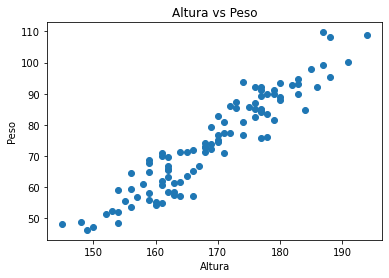

In [8]:
data = np.loadtxt('data/medidas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,0].reshape(-1,1), data[:,1].reshape(-1,1)

print(x.shape, y.shape)
plt.title('Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.scatter(x, y)

(100, 1) (100, 1)


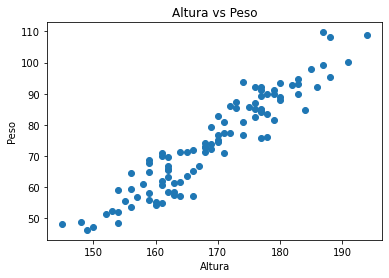

In [9]:
dataset = pd.read_csv('data/medidas.csv')
a = dataset.iloc[:, :-1].values
b = dataset.iloc[:, 1].values
print(x.shape, y.shape)
plt.title('Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.scatter(a, b)

In [10]:
dataset.describe()

,Altura,Peso
count,100.00000,100.000000
mean,168.99000,74.296900
std,10.64818,15.479705
min,145.00000,46.310000
25%,161.00000,61.217500
50%,169.00000,73.335000
75%,177.00000,86.350000
max,194.00000,109.720000


-1.0 0.9999999999999991
(80, 1) (80, 1)


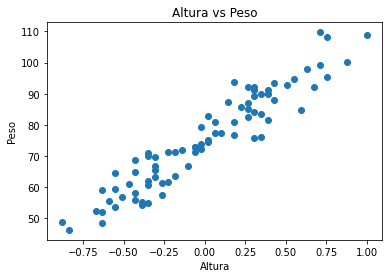

In [11]:
#Normalização dos dados entre -1 e 1
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

#Divide conjuntos de dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x.min(), x.max())
print(X_train.shape, y_train.shape)
plt.title('Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.scatter(X_train, y_train)

epoch:    0/5000 loss_train: 2835.90158294 + 0.00000000 = 2835.90158294 loss_val = 2835.90158294
epoch:  500/5000 loss_train: 31.59745449 + 0.00000000 = 31.59745449 loss_val = 31.59745449
epoch: 1000/5000 loss_train: 15.17016263 + 0.00000000 = 15.17016263 loss_val = 15.17016263
epoch: 1500/5000 loss_train: 12.68878644 + 0.00000000 = 12.68878644 loss_val = 12.68878644
epoch: 2000/5000 loss_train: 12.31129548 + 0.00000000 = 12.31129548 loss_val = 12.31129548
epoch: 2500/5000 loss_train: 12.25386778 + 0.00000000 = 12.25386778 loss_val = 12.25386778
epoch: 3000/5000 loss_train: 12.24513130 + 0.00000000 = 12.24513130 loss_val = 12.24513130
epoch: 3500/5000 loss_train: 12.24380222 + 0.00000000 = 12.24380222 loss_val = 12.24380222
epoch: 4000/5000 loss_train: 12.24360003 + 0.00000000 = 12.24360003 loss_val = 12.24360003
epoch: 4500/5000 loss_train: 12.24356927 + 0.00000000 = 12.24356927 loss_val = 12.24356927
epoch: 5000/5000 loss_train: 12.24356459 + 0.00000000 = 12.24356459 loss_val = 12.24

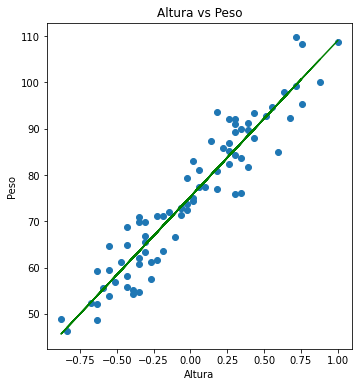

In [12]:
input_dim, output_dim = X_train.shape[1], y_train.shape[1]

# solução para o problema de regressão aqui - dependendo da learnig rate, c precisa de mais ou menos epochs
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-2)
nn.layers.append(Layer(input_dim=input_dim, output_dim=output_dim,activation=rna.linear))  #basta um perceptron (camada)

#aprendizado da rede com o conjunto de dados de treinamento
nn.fit(X_train, y_train, epochs=5000, verbose=500)

print(nn.layers[0].weights)
print(nn.layers[0].biases)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train)
plt.title('Altura vs Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.plot(X_train, nn.predict(X_train), c='green')   

In [13]:
#ref. https://stackabuse.com/linear-regression-in-python-with-scikit-learn

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.coef_)
print(regressor.intercept_)
y_pred = regressor.predict(X_test)

[[33.77931]]
[75.28044]


In [14]:
# Predição com dados de teste da regressão linear do sklearn
#data[:,0].reshape(-1,1)
y_pred = regressor.predict(X_test)
print(y_pred.shape, y_test.shape)
df = pd.DataFrame({'Actual': y_pred[:,0], 'Predicted': y_test[:,0]})
df.head(3)

(20, 1) (20, 1)


,Actual,Predicted
0,77.348558,70.84
1,64.939834,66.01
2,89.757282,88.93


In [15]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# O valor do root mean squared error é 5.73, que é menos que 10% do valor médio dos pesos de todas as pessoas que é de 74.296900. Isso implica que o algoritmo fez um bom trabalho.

Mean Absolute Error: 4.3776409927162385
Mean Squared Error: 32.88862825151658
Root Mean Squared Error: 5.734860787457406


In [16]:
df.drop(df.index, inplace=True)
df
y_pred_nn = nn.predict(X_test)
print(y_pred_nn.shape, y_test.shape)
df = pd.DataFrame({'Actual': y_pred_nn[:,0], 'Predicted': y_test[:,0]})
df.head(3)

(20, 1) (20, 1)


,Actual,Predicted
0,77.348368,70.84
1,64.940741,66.01
2,89.755994,88.93


In [17]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_nn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_nn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn)))
# O valor do root mean squared error é 5.73, que é menos que 10% do valor médio dos pesos de todas as pessoas que é de 74.296900. Isso implica que o algoritmo fez um bom trabalho.

Mean Absolute Error: 4.377255362998971
Mean Squared Error: 32.88779062427803
Root Mean Squared Error: 5.734787757561568


In [18]:
print('MAE (sklearn - ANN):', metrics.mean_absolute_error(y_test, y_pred) - metrics.mean_absolute_error(y_test, y_pred_nn))
print('MSE (sklearn - ANN):', metrics.mean_squared_error(y_test, y_pred) - metrics.mean_squared_error(y_test, y_pred_nn))
print('RMSE (sklearn - ANN):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)) - np.sqrt(metrics.mean_squared_error(y_test, y_pred_nn)))
# CONCLUSÃO: A rede neural é um pouco, muito pouco, melhor que o sklearn LinearRegression ()

MAE (sklearn - ANN): 0.00038562971726729955
MSE (sklearn - ANN): 0.0008376272385461903
RMSE (sklearn - ANN): 7.302989583823916e-05


### Regressão Linear Multivariada - Exercício de Regressão do Perceptron

In [19]:
data = np.loadtxt('data/notas.csv', delimiter=',', skiprows=1)
print(data.shape)

x, y = data[:,:-1], data[:,-1].reshape(-1,1)
print(x.shape, y.shape)

(25, 4)
(25, 3) (25, 1)


In [20]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1. -1. -1.] [1. 1. 1.]


In [21]:
input_dim, output_dim = x.shape[1], y.shape[1]

# insira sua rede aqui!
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=output_dim,activation=rna.linear)) #apenas uma camadas pois estamos reproduzindo um perceptrom

nn.fit(x, y, epochs=2000, verbose=200)

print(nn.layers[0].weights)
print(nn.layers[0].biases)


epoch:    0/2000 loss_train: 10010.02802345 + 0.00000000 = 10010.02802345 loss_val = 10010.02802345
epoch:  200/2000 loss_train: 6.26604039 + 0.00000000 = 6.26604039 loss_val = 6.26604039
epoch:  400/2000 loss_train: 3.84083754 + 0.00000000 = 3.84083754 loss_val = 3.84083754
epoch:  600/2000 loss_train: 3.17884699 + 0.00000000 = 3.17884699 loss_val = 3.17884699
epoch:  800/2000 loss_train: 2.97889314 + 0.00000000 = 2.97889314 loss_val = 2.97889314
epoch: 1000/2000 loss_train: 2.91143587 + 0.00000000 = 2.91143587 loss_val = 2.91143587
epoch: 1200/2000 loss_train: 2.88633795 + 0.00000000 = 2.88633795 loss_val = 2.88633795
epoch: 1400/2000 loss_train: 2.87630569 + 0.00000000 = 2.87630569 loss_val = 2.87630569
epoch: 1600/2000 loss_train: 2.87210872 + 0.00000000 = 2.87210872 loss_val = 2.87210872
epoch: 1800/2000 loss_train: 2.87030613 + 0.00000000 = 2.87030613 loss_val = 2.87030613
epoch: 2000/2000 loss_train: 2.86952073 + 0.00000000 = 2.86952073 loss_val = 2.86952073
[[ 8.91867 13.98832 

### Regressão Quadrática

(100, 1) (100, 1)


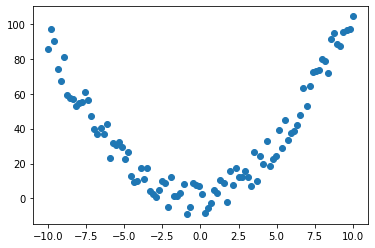

In [22]:
x, y = make_square(n_samples=100, x_min=-10, x_max=10, a=1, b=1, c=1, noise=10)

print(x.shape, y.shape)
plt.scatter(x, y)

In [23]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


epoch:    0/5000 loss_train: 1219.79308378 + 0.00000000 = 1219.79308378 loss_val = 1219.79308378
epoch:  500/5000 loss_train: 21.29320771 + 0.00000000 = 21.29320771 loss_val = 21.29320771
epoch: 1000/5000 loss_train: 19.08333719 + 0.00000000 = 19.08333719 loss_val = 19.08333719
epoch: 1500/5000 loss_train: 18.59131526 + 0.00000000 = 18.59131526 loss_val = 18.59131526
epoch: 2000/5000 loss_train: 17.86301640 + 0.00000000 = 17.86301640 loss_val = 17.86301640
epoch: 2500/5000 loss_train: 17.58314964 + 0.00000000 = 17.58314964 loss_val = 17.58314964
epoch: 3000/5000 loss_train: 17.40785378 + 0.00000000 = 17.40785378 loss_val = 17.40785378
epoch: 3500/5000 loss_train: 17.28501055 + 0.00000000 = 17.28501055 loss_val = 17.28501055
epoch: 4000/5000 loss_train: 17.29666598 + 0.00000000 = 17.29666598 loss_val = 17.29666598
epoch: 4500/5000 loss_train: 17.17027752 + 0.00000000 = 17.17027752 loss_val = 17.17027752
epoch: 5000/5000 loss_train: 17.77312084 + 0.00000000 = 17.77312084 loss_val = 17.77

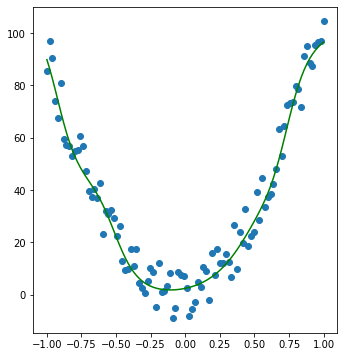

In [24]:
input_dim, output_dim = x.shape[1], y.shape[1]

# para solução é necessario definir -  # de camadas ? # de neuronios por camada, qual função ativação ?
# no entanto temos: # neuronios ultima camada = # de saídas (o caso 1, que é o Y)
# por ser um problema de regressão a função da saída tem que ser linear 
#nn = NeuralNetwork(cost_func = mse, learning_rate = 1e-3) #sem momentum
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-3, momentum=0.9) #inclusão do momentum para reduzir a quantidade de epochs e aumentar taxa de 
nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation=rna.tanh)) #entrada dessa camada é a saída da anterior 
nn.layers.append(Layer(input_dim=10, output_dim=10, activation=rna.tanh))
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) 
#aqui precisei de mais de uma camada pois não é um problema linear 
nn.fit(x, y, epochs=5000, verbose=500)

#print(nn.layers[0].weights)
#print(nn.layers[0].biases)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Cúbica

(100, 1) (100, 1)


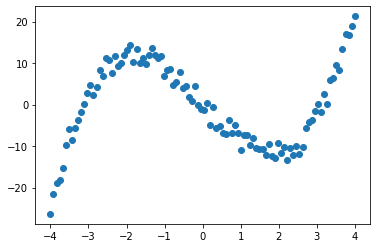

In [25]:
x, y = make_cubic(n_samples=100, x_min=-4, x_max=4, a=1, b=0, c=-10, d=0, noise=3)

print(x.shape, y.shape)
plt.scatter(x, y)

In [26]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


epoch:    0/5000 loss_train: 59.19423126 + 0.00000000 = 59.19423126 loss_val = 59.19423126
epoch:  500/5000 loss_train: 24.12875091 + 0.00000000 = 24.12875091 loss_val = 24.12875091
epoch: 1000/5000 loss_train: 13.68130796 + 0.00000000 = 13.68130796 loss_val = 13.68130796
epoch: 1500/5000 loss_train: 7.87538800 + 0.00000000 = 7.87538800 loss_val = 7.87538800
epoch: 2000/5000 loss_train: 5.49331206 + 0.00000000 = 5.49331206 loss_val = 5.49331206
epoch: 2500/5000 loss_train: 4.74011892 + 0.00000000 = 4.74011892 loss_val = 4.74011892
epoch: 3000/5000 loss_train: 4.38283392 + 0.00000000 = 4.38283392 loss_val = 4.38283392
epoch: 3500/5000 loss_train: 4.03706366 + 0.00000000 = 4.03706366 loss_val = 4.03706366
epoch: 4000/5000 loss_train: 3.92661509 + 0.00000000 = 3.92661509 loss_val = 3.92661509
epoch: 4500/5000 loss_train: 3.72166941 + 0.00000000 = 3.72166941 loss_val = 3.72166941
epoch: 5000/5000 loss_train: 3.56686513 + 0.00000000 = 3.56686513 loss_val = 3.56686513
[[ 2.07762]
 [-0.20059]

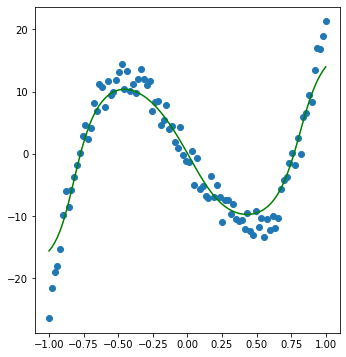

In [27]:
input_dim, output_dim = x.shape[1], y.shape[1]

# para solução é necessario definir -  # de camadas ? # de neuronios por camada, qual função ativação ?
# no entanto temos: # neuronios ultima camada = # de saídas (o caso 1, que é o Y)
# por ser um problema de regressão a função da saída tem que ser linear 
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-3)

nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation=rna.tanh))


nn.layers.append(Layer(input_dim=10, output_dim=50, activation=rna.tanh,dropout_prob=0.5)) #só se aplica dropout nas camadas intermediárias
nn.layers.append(Layer(input_dim=50, output_dim=output_dim,activation=rna.linear)) #entrada dessa camada é a saída da anterior 
#aqui precisei de mais de uma camada pois não é um problema linear 
nn.fit(x, y, epochs=5000, verbose=500)

print(nn.layers[0].weights)
print(nn.layers[0].biases)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Logarítimica

(100, 1) (100, 1)


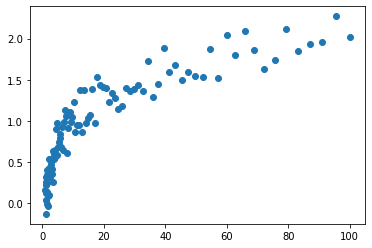

In [28]:
x, y = make_log10(n_samples=100, x_min=1, x_max=100, noise=0.3)

print(x.shape, y.shape)
plt.scatter(x, y)

In [29]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


epoch:    0/10000 loss_train: 0.70551628 + 0.00000000 = 0.70551628 loss_val = 0.70551628
epoch: 1000/10000 loss_train: 0.11891396 + 0.00000000 = 0.11891396 loss_val = 0.11891396
epoch: 2000/10000 loss_train: 0.07583373 + 0.00000000 = 0.07583373 loss_val = 0.07583373
epoch: 3000/10000 loss_train: 0.05080467 + 0.00000000 = 0.05080467 loss_val = 0.05080467
epoch: 4000/10000 loss_train: 0.03822958 + 0.00000000 = 0.03822958 loss_val = 0.03822958
epoch: 5000/10000 loss_train: 0.03236755 + 0.00000000 = 0.03236755 loss_val = 0.03236755
epoch: 6000/10000 loss_train: 0.02954220 + 0.00000000 = 0.02954220 loss_val = 0.02954220
epoch: 7000/10000 loss_train: 0.02801013 + 0.00000000 = 0.02801013 loss_val = 0.02801013
epoch: 8000/10000 loss_train: 0.02703732 + 0.00000000 = 0.02703732 loss_val = 0.02703732
epoch: 9000/10000 loss_train: 0.02632591 + 0.00000000 = 0.02632591 loss_val = 0.02632591
epoch: 10000/10000 loss_train: 0.02575398 + 0.00000000 = 0.02575398 loss_val = 0.02575398
[[-1.20627]
 [-3.903

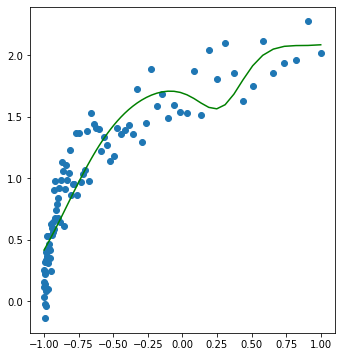

In [30]:
input_dim, output_dim = x.shape[1], y.shape[1]

# para solução é necessario definir -  # de camadas ? # de neuronios por camada, qual função ativação ?
# no entanto temos: # neuronios ultima camada = # de saídas (o caso 1, que é o Y)
# por ser um problema de regressão a função da saída tem que ser linear 
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-3)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation=rna.tanh))
nn.layers.append(Layer(input_dim=10, output_dim=10, activation=rna.tanh))
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) #entrada dessa camada é a saída da anterior 
#aqui precisei de mais de uma camada pois não é um problema linear 
nn.fit(x, y, epochs=10000, verbose=1000)

print(nn.layers[0].weights)
print(nn.layers[0].biases)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

### Regressão Exponencial

(100, 1) (100, 1)


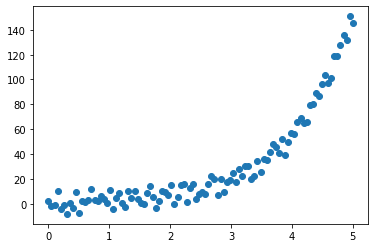

In [31]:
x, y = make_exp(n_samples=100, x_min=0, x_max=5, noise=10)

print(x.shape, y.shape)
plt.scatter(x, y)

In [32]:
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(axis=0), x.max(axis=0))

[-1.] [1.]


epoch:    0/5000 loss_train: 1571.61857414 + 0.00000000 = 1571.61857414 loss_val = 1571.61857414
epoch:  500/5000 loss_train: 14.48166258 + 0.00000000 = 14.48166258 loss_val = 14.48166258
epoch: 1000/5000 loss_train: 13.81900311 + 0.00000000 = 13.81900311 loss_val = 13.81900311
epoch: 1500/5000 loss_train: 13.67073681 + 0.00000000 = 13.67073681 loss_val = 13.67073681
epoch: 2000/5000 loss_train: 13.56448523 + 0.00000000 = 13.56448523 loss_val = 13.56448523
epoch: 2500/5000 loss_train: 13.49538984 + 0.00000000 = 13.49538984 loss_val = 13.49538984
epoch: 3000/5000 loss_train: 13.46048260 + 0.00000000 = 13.46048260 loss_val = 13.46048260
epoch: 3500/5000 loss_train: 13.36774774 + 0.00000000 = 13.36774774 loss_val = 13.36774774
epoch: 4000/5000 loss_train: 13.34215946 + 0.00000000 = 13.34215946 loss_val = 13.34215946
epoch: 4500/5000 loss_train: 13.32557433 + 0.00000000 = 13.32557433 loss_val = 13.32557433
epoch: 5000/5000 loss_train: 13.30981708 + 0.00000000 = 13.30981708 loss_val = 13.30

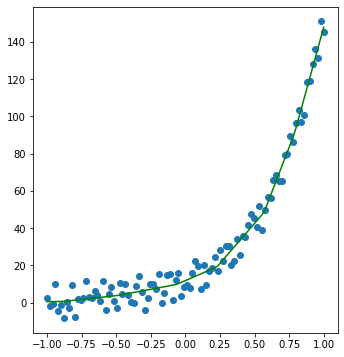

In [33]:
input_dim, output_dim = x.shape[1], y.shape[1]

# para solução é necessario definir -  # de camadas ? # de neuronios por camada, qual função ativação ?
# aqui relu ou tanh deu no mesmo
# no entanto temos: # neuronios ultima camada = # de saídas (o caso 1, que é o Y)
# por ser um problema de regressão a função da saída tem que ser linear 
nn = NeuralNetwork(cost_func = rna.mse, learning_rate = 1e-3)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation=rna.relu))
nn.layers.append(Layer(input_dim=10, output_dim=10, activation=rna.relu))
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) #entrada dessa camada é a saída da anterior 
#aqui precisei de mais de uma camada pois não é um problema linear 
nn.fit(x, y, epochs=5000, verbose=500)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

## Classificação Binária

### Porta AND/OR

(4, 2) (4, 1)


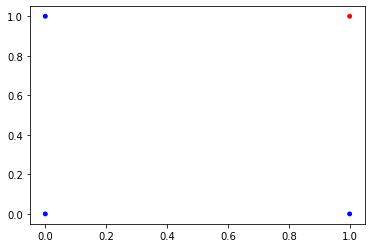

In [34]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1]).reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/1000 loss_train: 0.84426885 + 0.00000000 = 0.84426885 loss_val = 0.84426885
epoch:  100/1000 loss_train: 0.14568954 + 0.00000000 = 0.14568954 loss_val = 0.14568954
epoch:  200/1000 loss_train: 0.08228749 + 0.00000000 = 0.08228749 loss_val = 0.08228749
epoch:  300/1000 loss_train: 0.05683428 + 0.00000000 = 0.05683428 loss_val = 0.05683428
epoch:  400/1000 loss_train: 0.04322028 + 0.00000000 = 0.04322028 loss_val = 0.04322028
epoch:  500/1000 loss_train: 0.03478939 + 0.00000000 = 0.03478939 loss_val = 0.03478939
epoch:  600/1000 loss_train: 0.02907293 + 0.00000000 = 0.02907293 loss_val = 0.02907293
epoch:  700/1000 loss_train: 0.02494968 + 0.00000000 = 0.02494968 loss_val = 0.02494968
epoch:  800/1000 loss_train: 0.02183896 + 0.00000000 = 0.02183896 loss_val = 0.02183896
epoch:  900/1000 loss_train: 0.01941067 + 0.00000000 = 0.01941067 loss_val = 0.01941067
epoch: 1000/1000 loss_train: 0.01746363 + 0.00000000 = 0.01746363 loss_val = 0.01746363
Predições:
[[0.00001]
 [0.02029]

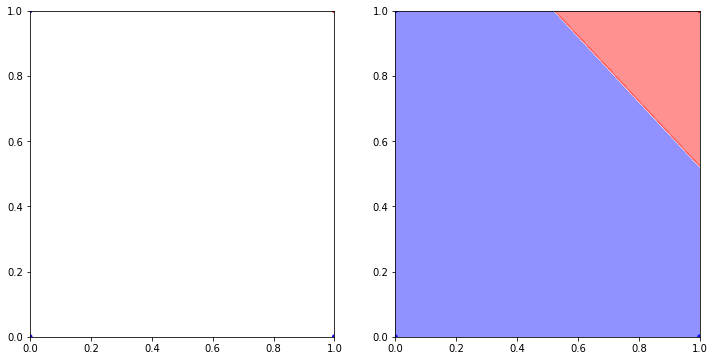

In [35]:
input_dim, output_dim = x.shape[1], y.shape[1]

# 
nn = NeuralNetwork(cost_func=rna.binary_cross_entropy, learning_rate=1.0)
nn.layers.append(Layer(input_dim=input_dim, output_dim=output_dim, activation=rna.sigmoid))

nn.fit(x, y, epochs = 1000, verbose = 100)
y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### Porta XOR

(4, 2) (4, 1)


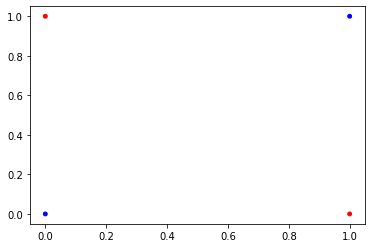

In [36]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/1000 loss_train: 0.69414466 + 0.00000000 = 0.69414466 loss_val = 0.69414466
epoch:  100/1000 loss_train: 0.68862997 + 0.00000000 = 0.68862997 loss_val = 0.68862997
epoch:  200/1000 loss_train: 0.63981364 + 0.00000000 = 0.63981364 loss_val = 0.63981364
epoch:  300/1000 loss_train: 0.51144005 + 0.00000000 = 0.51144005 loss_val = 0.51144005
epoch:  400/1000 loss_train: 0.39253483 + 0.00000000 = 0.39253483 loss_val = 0.39253483
epoch:  500/1000 loss_train: 0.10048853 + 0.00000000 = 0.10048853 loss_val = 0.10048853
epoch:  600/1000 loss_train: 0.05076753 + 0.00000000 = 0.05076753 loss_val = 0.05076753
epoch:  700/1000 loss_train: 0.03366792 + 0.00000000 = 0.03366792 loss_val = 0.03366792
epoch:  800/1000 loss_train: 0.02508898 + 0.00000000 = 0.02508898 loss_val = 0.02508898
epoch:  900/1000 loss_train: 0.01995184 + 0.00000000 = 0.01995184 loss_val = 0.01995184
epoch: 1000/1000 loss_train: 0.01653928 + 0.00000000 = 0.01653928 loss_val = 0.01653928
Predições:
[[0.0158 ]
 [0.97991]

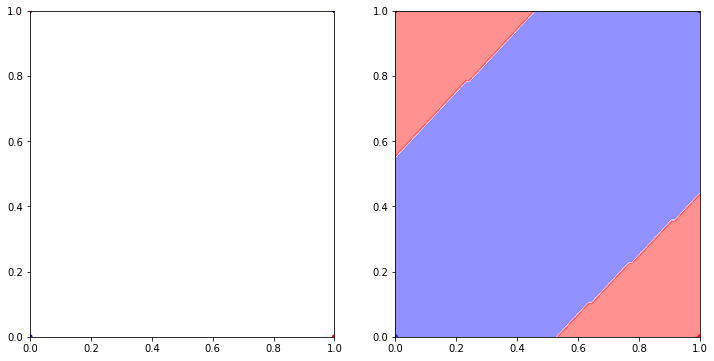

In [37]:
input_dim, output_dim = x.shape[1], y.shape[1]

# insira sua rede aqui!
nn = NeuralNetwork(cost_func=rna.binary_cross_entropy, learning_rate=1.0)
nn.layers.append(Layer(input_dim=input_dim, output_dim=2, activation=rna.sigmoid))
nn.layers.append(Layer(input_dim=2, output_dim=output_dim, activation=rna.sigmoid))

nn.fit(x, y, epochs=1000, verbose=100 )

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold= 0.5, cmap='bwr')

### 2 Clusters

(100, 2) (100, 1)


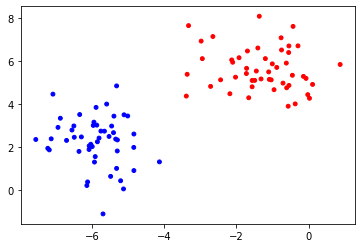

In [38]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/5000 loss_train: 0.02384892 + 0.00000000 = 0.02384892 loss_val = 0.02384892
epoch: 1000/5000 loss_train: 0.00573368 + 0.00000000 = 0.00573368 loss_val = 0.00573368
epoch: 2000/5000 loss_train: 0.00399852 + 0.00000000 = 0.00399852 loss_val = 0.00399852
epoch: 3000/5000 loss_train: 0.00321042 + 0.00000000 = 0.00321042 loss_val = 0.00321042
epoch: 4000/5000 loss_train: 0.00273516 + 0.00000000 = 0.00273516 loss_val = 0.00273516
epoch: 5000/5000 loss_train: 0.00240819 + 0.00000000 = 0.00240819 loss_val = 0.00240819
Acurácia: 100.00%


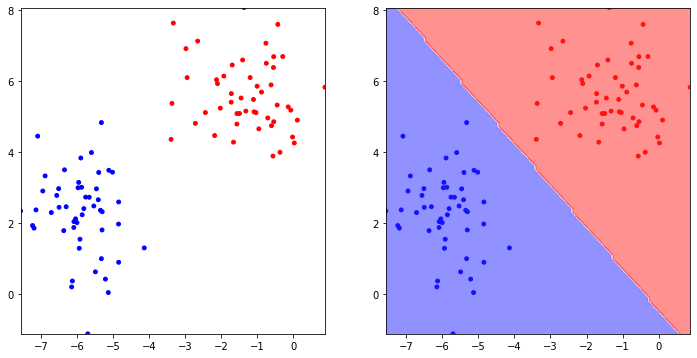

In [39]:
input_dim, output_dim = x.shape[1], y.shape[1]

#configuração da rede - problema de classificação binária (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 1e-1)
#1 neurônio é suficiente pois é possivel separar as classes com uma reta. A func. de ativação pode ser a linear tb.
nn.layers.append(Layer(input_dim=input_dim, output_dim=output_dim,activation=rna.sigmoid)) 
nn.fit(x, y, epochs=5000, verbose=1000)

y_pred = nn.predict(x)

threshold = 0 if nn.layers[-1].activation == rna.linear else 0.5
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred >= threshold)))
plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold=threshold, cmap='bwr')

### 4 Clusters

(500, 2) (500, 1)


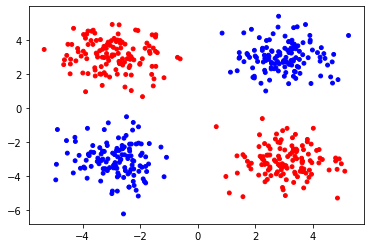

In [40]:
x, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.9, centers=[(-3, -3), (3, 3), (-3, 3), (3, -3)], random_state=1234)
y = y.reshape(-1, 1)
y = np.where(y >= 2, 1, 0)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/1000 loss_train: 1.18489505 + 0.00000000 = 1.18489505 loss_val = 1.18489505
epoch:  100/1000 loss_train: 0.06159417 + 0.00000000 = 0.06159417 loss_val = 0.06159417
epoch:  200/1000 loss_train: 0.04082814 + 0.00000000 = 0.04082814 loss_val = 0.04082814
epoch:  300/1000 loss_train: 0.03054575 + 0.00000000 = 0.03054575 loss_val = 0.03054575
epoch:  400/1000 loss_train: 0.02435350 + 0.00000000 = 0.02435350 loss_val = 0.02435350
epoch:  500/1000 loss_train: 0.02026472 + 0.00000000 = 0.02026472 loss_val = 0.02026472
epoch:  600/1000 loss_train: 0.01737743 + 0.00000000 = 0.01737743 loss_val = 0.01737743
epoch:  700/1000 loss_train: 0.01519698 + 0.00000000 = 0.01519698 loss_val = 0.01519698
epoch:  800/1000 loss_train: 0.01348818 + 0.00000000 = 0.01348818 loss_val = 0.01348818
epoch:  900/1000 loss_train: 0.01212217 + 0.00000000 = 0.01212217 loss_val = 0.01212217
epoch: 1000/1000 loss_train: 0.01100225 + 0.00000000 = 0.01100225 loss_val = 0.01100225
Acurácia: 100.00%


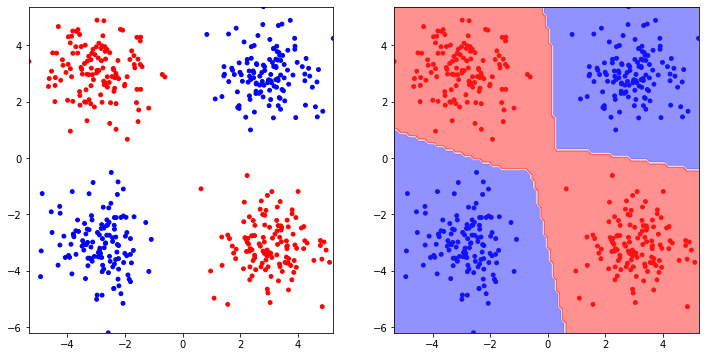

In [41]:
input_dim, output_dim = x.shape[1], y.shape[1]

#configuração da rede - problema de classificação binária (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 1e-1)
#1 neurônio não é mais suficiente pois n da para separar as classes com uma reta. 
nn.layers.append(Layer(input_dim=input_dim, output_dim=4,activation=rna.relu)) 
nn.layers.append(Layer(input_dim=4, output_dim=4,activation=rna.relu)) 
nn.layers.append(Layer(input_dim=4, output_dim=output_dim,activation=rna.sigmoid)) 
nn.fit(x, y, epochs=1000, verbose=100) #porque 1000 epochs ? tentativa e erro !! 

y_pred = nn.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold=0.5, cmap='bwr')

### Círculos

(500, 2) (500, 1)


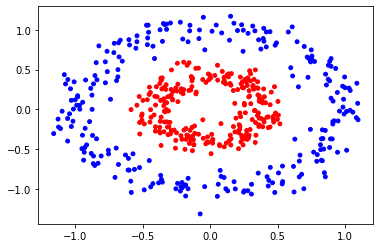

In [42]:
x, y = make_circles(n_samples=500, noise=0.1, factor=0.4, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/1000 loss_train: 1.99608763 + 0.00000000 = 1.99608763 loss_val = 1.99608763
epoch:  100/1000 loss_train: 0.40633105 + 0.00000000 = 0.40633105 loss_val = 0.40633105
epoch:  200/1000 loss_train: 0.15026560 + 0.00000000 = 0.15026560 loss_val = 0.15026560
epoch:  300/1000 loss_train: 0.06605228 + 0.00000000 = 0.06605228 loss_val = 0.06605228
epoch:  400/1000 loss_train: 0.04134474 + 0.00000000 = 0.04134474 loss_val = 0.04134474
epoch:  500/1000 loss_train: 0.03024221 + 0.00000000 = 0.03024221 loss_val = 0.03024221
epoch:  600/1000 loss_train: 0.02391304 + 0.00000000 = 0.02391304 loss_val = 0.02391304
epoch:  700/1000 loss_train: 0.01988937 + 0.00000000 = 0.01988937 loss_val = 0.01988937
epoch:  800/1000 loss_train: 0.01710269 + 0.00000000 = 0.01710269 loss_val = 0.01710269
epoch:  900/1000 loss_train: 0.01505037 + 0.00000000 = 0.01505037 loss_val = 0.01505037
epoch: 1000/1000 loss_train: 0.01347497 + 0.00000000 = 0.01347497 loss_val = 0.01347497
Acurácia: 100.00%


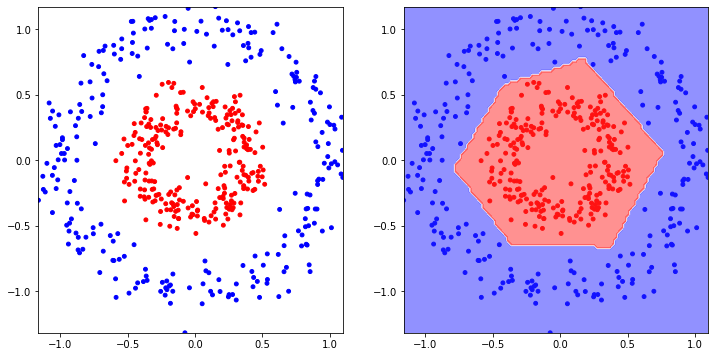

In [43]:
input_dim, output_dim = x.shape[1], y.shape[1]

#configuração da rede - problema de classificação binária (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 1e-1)
#1 neurônio não é mais suficiente pois n da para separar as classes com uma reta. 8 neurônios por camada, porque ?
nn.layers.append(Layer(input_dim=input_dim, output_dim=8,activation=rna.relu)) 
nn.layers.append(Layer(input_dim=8, output_dim=8,activation=rna.relu)) 
nn.layers.append(Layer(input_dim=8, output_dim=output_dim,activation=rna.sigmoid)) 
nn.fit(x, y, epochs=1000, verbose=100) #porque 1000 epochs ? tentativa e erro !! 

y_pred = nn.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold=0.5, cmap='bwr')

### Moons

(200, 2) (200, 1)


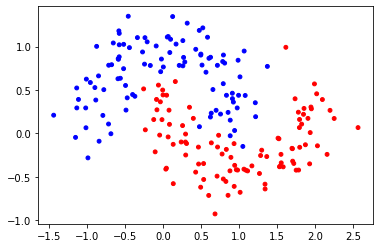

In [44]:
x, y = make_moons(200, noise=0.20)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/2000 loss_train: 0.94328579 + 0.07146053 = 1.01474631 loss_val = 0.94328579
epoch:  200/2000 loss_train: 0.29115734 + 0.07659968 = 0.36775702 loss_val = 0.29115734
epoch:  400/2000 loss_train: 0.25710801 + 0.07875738 = 0.33586539 loss_val = 0.25710801
epoch:  600/2000 loss_train: 0.23369051 + 0.08216450 = 0.31585500 loss_val = 0.23369051
epoch:  800/2000 loss_train: 0.21418829 + 0.08704318 = 0.30123147 loss_val = 0.21418829
epoch: 1000/2000 loss_train: 0.19770324 + 0.09237199 = 0.29007523 loss_val = 0.19770324
epoch: 1200/2000 loss_train: 0.18404539 + 0.09752956 = 0.28157495 loss_val = 0.18404539
epoch: 1400/2000 loss_train: 0.17305173 + 0.10218773 = 0.27523946 loss_val = 0.17305173
epoch: 1600/2000 loss_train: 0.16438926 + 0.10620939 = 0.27059866 loss_val = 0.16438926
epoch: 1800/2000 loss_train: 0.15764088 + 0.10958090 = 0.26722177 loss_val = 0.15764088
epoch: 2000/2000 loss_train: 0.15240254 + 0.11235602 = 0.26475856 loss_val = 0.15240254
Acurácia: 95.50%


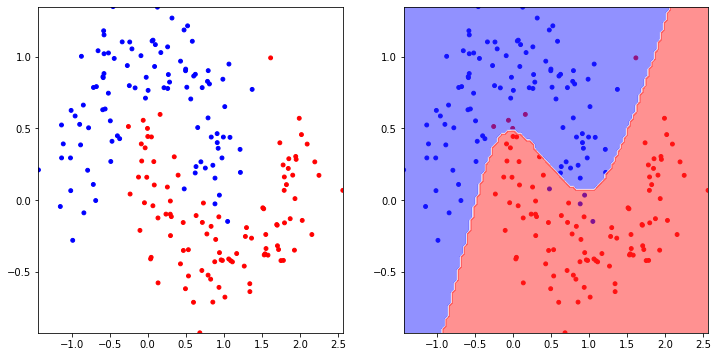

In [45]:
input_dim, output_dim = x.shape[1], y.shape[1]

# Usa regularização l1/l2 para reduzir o overfitting

#configuração da rede - problema de classificação binária (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 1e-1)
#1 neurônio não é mais suficiente pois n da para separar as classes com uma reta. 

# relu ou tanh | reg_strength [0.1, 0.5, 1.0]
#nn.layers.append(Layer(input_dim=input_dim, output_dim=8,activation=tanh) # rede com overfit
#nn.layers.append(Layer(input_dim=8, output_dim=8,activation=relu))  remove-se uma camada e duplica as 1000 epochs

nn.layers.append(Layer(input_dim=input_dim, output_dim=8,activation=rna.tanh,reg_strength=1.0, reg_func=rna.l2_regularization)) #rede regularizada com l1
nn.layers.append(Layer(input_dim=8, output_dim=output_dim,activation=rna.sigmoid,reg_strength=1.0, reg_func=rna.l2_regularization)) 
nn.fit(x, y, epochs=2000, verbose=200) #porque 1000 epochs ? tentativa e erro !! 

y_pred = nn.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold=0.5, cmap='bwr')

### Espiral

(200, 2) (200, 1)


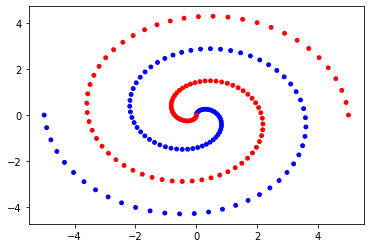

In [46]:
x, y = make_spiral(n_samples=100, n_class=2, radius=5, laps=1.75)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

epoch:    0/5000 loss_train: 1.44830550 + 0.00000000 = 1.44830550 loss_val = 1.44830550
epoch: 1000/5000 loss_train: 0.04044622 + 0.00000000 = 0.04044622 loss_val = 0.04044622
epoch: 2000/5000 loss_train: 0.01589816 + 0.00000000 = 0.01589816 loss_val = 0.01589816
epoch: 3000/5000 loss_train: 0.01217414 + 0.00000000 = 0.01217414 loss_val = 0.01217414
epoch: 4000/5000 loss_train: 0.01066527 + 0.00000000 = 0.01066527 loss_val = 0.01066527
epoch: 5000/5000 loss_train: 0.00982624 + 0.00000000 = 0.00982624 loss_val = 0.00982624
Acurácia: 99.50%


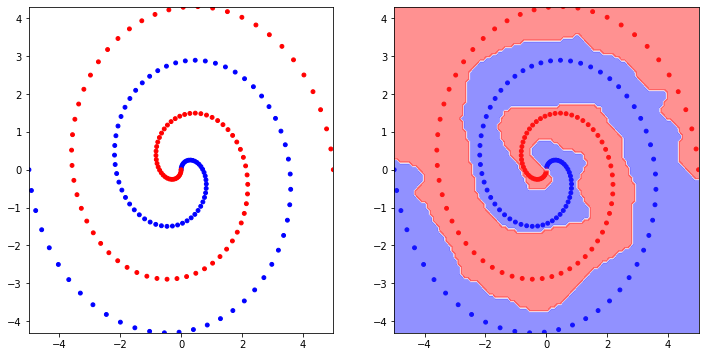

In [47]:
input_dim, output_dim = x.shape[1], y.shape[1]

#configuração da rede - problema de classificação binária (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 1e-1)
#1 neurônio não é mais suficiente pois n da para separar as classes com uma reta. 
nn.layers.append(Layer(input_dim=input_dim, output_dim=20,activation=rna.tanh)) # tanh pois incli sen/cos 
nn.layers.append(Layer(input_dim=20, output_dim=20,activation=rna.tanh,batch_norm=True))  #uso da batch normalization - função de custo melhor e passamos de 10k para 5k epochs
nn.layers.append(Layer(input_dim=20, output_dim=output_dim,activation=rna.sigmoid,batch_norm=True)) 
nn.fit(x, y, epochs=5000, verbose=1000) #porque 10000 epochs ? tentativa e erro !! 

y_pred = nn.predict(x)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

plot.classification_predictions(x, y, is_binary=True, nn=nn, threshold=0.5, cmap='bwr')

## Classificação Multiclasse

### 3 Clusters Multiclasse

(300, 2) (300, 1)


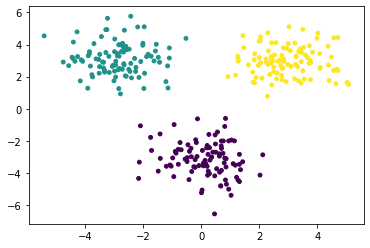

In [48]:
x, y = make_blobs(n_samples=300, n_features=2, centers=[(0, -3), (-3, 3), (3, 3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [49]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::60])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


epoch:    0/1000 loss_train: 0.66944374 + 0.00000000 = 0.66944374 loss_val = 0.66944374
epoch:  100/1000 loss_train: 0.10825133 + 0.00000000 = 0.10825133 loss_val = 0.10825133
epoch:  200/1000 loss_train: 0.05402886 + 0.00000000 = 0.05402886 loss_val = 0.05402886
epoch:  300/1000 loss_train: 0.03540041 + 0.00000000 = 0.03540041 loss_val = 0.03540041
epoch:  400/1000 loss_train: 0.02612314 + 0.00000000 = 0.02612314 loss_val = 0.02612314
epoch:  500/1000 loss_train: 0.02061903 + 0.00000000 = 0.02061903 loss_val = 0.02061903
epoch:  600/1000 loss_train: 0.01699393 + 0.00000000 = 0.01699393 loss_val = 0.01699393
epoch:  700/1000 loss_train: 0.01442969 + 0.00000000 = 0.01442969 loss_val = 0.01442969
epoch:  800/1000 loss_train: 0.01252271 + 0.00000000 = 0.01252271 loss_val = 0.01252271
epoch:  900/1000 loss_train: 0.01104947 + 0.00000000 = 0.01104947 loss_val = 0.01104947
epoch: 1000/1000 loss_train: 0.00987900 + 0.00000000 = 0.00987900 loss_val = 0.00987900
Acurácia: 100.00%


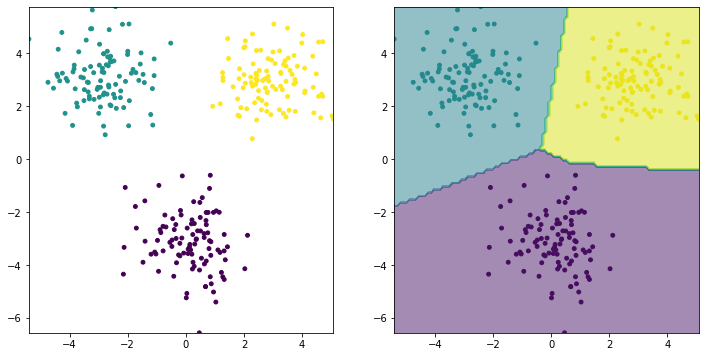

In [50]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]

#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=2,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=2, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=1000, verbose=100) #porque 10000 epochs ? tentativa e erro !! 
    
y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plot.classification_predictions(x, y, is_binary=False, nn=nn)

### 4 Clusters Multiclasse

(400, 2) (400, 1)


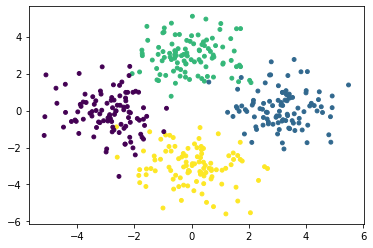

In [51]:
x, y = make_blobs(n_samples=400, n_features=2, centers=[(-3, 0), (3, 0), (0, 3), (0, -3)], random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [52]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::70])

[[0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]


epoch:    0/1000 loss_train: 3.84616322 + 0.00000000 = 3.84616322 loss_val = 3.84616322
epoch:  100/1000 loss_train: 0.51943901 + 0.00000000 = 0.51943901 loss_val = 0.51943901
epoch:  200/1000 loss_train: 0.40331577 + 0.00000000 = 0.40331577 loss_val = 0.40331577
epoch:  300/1000 loss_train: 0.22647243 + 0.00000000 = 0.22647243 loss_val = 0.22647243
epoch:  400/1000 loss_train: 0.15301836 + 0.00000000 = 0.15301836 loss_val = 0.15301836
epoch:  500/1000 loss_train: 0.12883994 + 0.00000000 = 0.12883994 loss_val = 0.12883994
epoch:  600/1000 loss_train: 0.11786773 + 0.00000000 = 0.11786773 loss_val = 0.11786773
epoch:  700/1000 loss_train: 0.11160667 + 0.00000000 = 0.11160667 loss_val = 0.11160667
epoch:  800/1000 loss_train: 0.10746837 + 0.00000000 = 0.10746837 loss_val = 0.10746837
epoch:  900/1000 loss_train: 0.10450125 + 0.00000000 = 0.10450125 loss_val = 0.10450125
epoch: 1000/1000 loss_train: 0.10223143 + 0.00000000 = 0.10223143 loss_val = 0.10223143
Acurácia: 96.75%


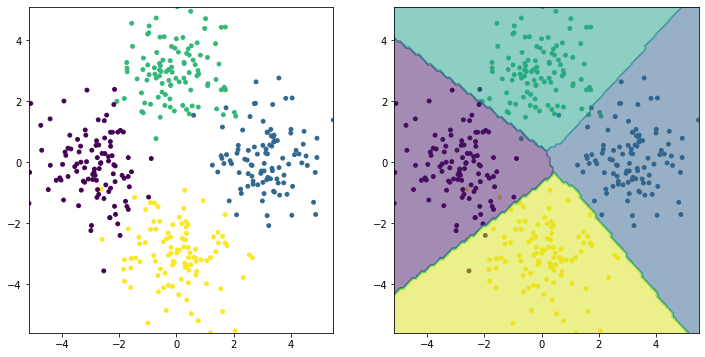

In [53]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]


#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=3,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=3, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=1000, verbose=100) #porque 10000 epochs ? tentativa e erro !! 

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plot.classification_predictions(x, y, is_binary=False, nn=nn)

### Espiral - 5 Classes

(500, 2) (500, 1)


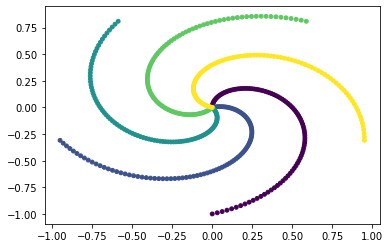

In [54]:
x, y = make_spiral(n_samples=100, n_class=5, radius=1, laps=0.5)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [55]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::100])

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


epoch:    0/2000 loss_train: 4.55765186 + 0.00000000 = 4.55765186 loss_val = 4.55765186
epoch:  200/2000 loss_train: 0.74854350 + 0.00000000 = 0.74854350 loss_val = 0.74854350
epoch:  400/2000 loss_train: 0.59543174 + 0.00000000 = 0.59543174 loss_val = 0.59543174
epoch:  600/2000 loss_train: 0.46358800 + 0.00000000 = 0.46358800 loss_val = 0.46358800
epoch:  800/2000 loss_train: 0.33548381 + 0.00000000 = 0.33548381 loss_val = 0.33548381
epoch: 1000/2000 loss_train: 0.23052355 + 0.00000000 = 0.23052355 loss_val = 0.23052355
epoch: 1200/2000 loss_train: 0.16988736 + 0.00000000 = 0.16988736 loss_val = 0.16988736
epoch: 1400/2000 loss_train: 0.13392516 + 0.00000000 = 0.13392516 loss_val = 0.13392516
epoch: 1600/2000 loss_train: 0.11047013 + 0.00000000 = 0.11047013 loss_val = 0.11047013
epoch: 1800/2000 loss_train: 0.09451112 + 0.00000000 = 0.09451112 loss_val = 0.09451112
epoch: 2000/2000 loss_train: 0.08404671 + 0.00000000 = 0.08404671 loss_val = 0.08404671
Acurácia: 98.60%


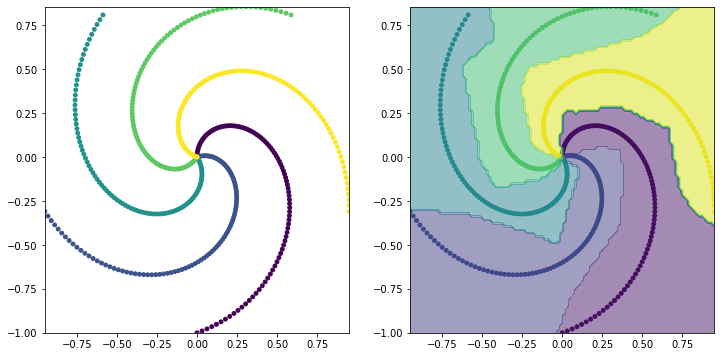

In [56]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]


#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=2000, verbose=200) #porque 2000 epochs ? tentativa e erro !! 

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plot.classification_predictions(x, y, is_binary=False, nn=nn)

### Make Classification - 4 Classes

(100, 2) (100, 1)


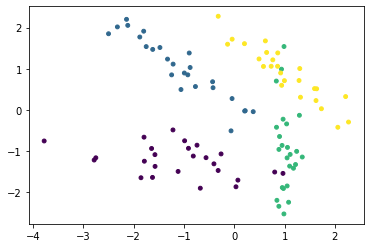

In [57]:
x, y = make_classification(n_samples=100, n_classes=4, n_features=2, n_clusters_per_class=1, n_redundant=0, n_repeated=0, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [58]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::10])

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


epoch:    0/2000 loss_train: 7.71135970 + 0.00000000 = 7.71135970 loss_val = 7.71135970
epoch:  200/2000 loss_train: 0.13618181 + 0.00000000 = 0.13618181 loss_val = 0.13618181
epoch:  400/2000 loss_train: 0.11562536 + 0.00000000 = 0.11562536 loss_val = 0.11562536
epoch:  600/2000 loss_train: 0.10781694 + 0.00000000 = 0.10781694 loss_val = 0.10781694
epoch:  800/2000 loss_train: 0.10774318 + 0.00000000 = 0.10774318 loss_val = 0.10774318
epoch: 1000/2000 loss_train: 0.10351406 + 0.00000000 = 0.10351406 loss_val = 0.10351406
epoch: 1200/2000 loss_train: 0.06900015 + 0.00000000 = 0.06900015 loss_val = 0.06900015
epoch: 1400/2000 loss_train: 0.06671133 + 0.00000000 = 0.06671133 loss_val = 0.06671133
epoch: 1600/2000 loss_train: 0.05858224 + 0.00000000 = 0.05858224 loss_val = 0.05858224
epoch: 1800/2000 loss_train: 0.05984853 + 0.00000000 = 0.05984853 loss_val = 0.05984853
epoch: 2000/2000 loss_train: 0.05594027 + 0.00000000 = 0.05594027 loss_val = 0.05594027
Acurácia: 98.00%


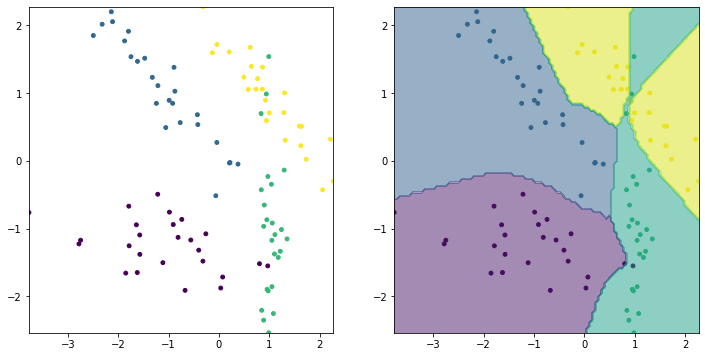

In [59]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]

#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=10,activation=rna.relu)) # tanh tb serve
nn.layers.append(Layer(input_dim=10, output_dim=output_dim,activation=rna.linear)) 
nn.fit(x, y_onehot, epochs=2000, verbose=200) #porque 10000 epochs ? tentativa e erro !! 

y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plot.classification_predictions(x, y, is_binary=False, nn=nn)

### Iris Dataset

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 2) (150, 1)


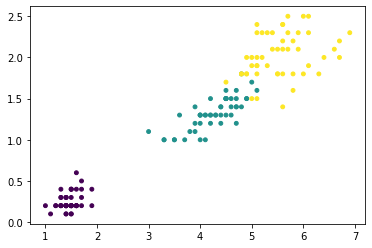

In [60]:
data = load_iris()
x, y = data.data[:, 2:], data.target.reshape(-1,1)

print(data.feature_names)
print(data.target_names)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap=plt.cm.viridis)

In [61]:
onehot = OneHotEncoder(sparse=False)
y_onehot = onehot.fit_transform(y)
print(y_onehot[::20])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


epoch:    0/2000 loss_train: 1.08623866 + 0.00000000 = 1.08623866 loss_val = 1.08623866
epoch:  200/2000 loss_train: 0.39799793 + 0.00000000 = 0.39799793 loss_val = 0.39799793
epoch:  400/2000 loss_train: 0.26291373 + 0.00000000 = 0.26291373 loss_val = 0.26291373
epoch:  600/2000 loss_train: 0.20021305 + 0.00000000 = 0.20021305 loss_val = 0.20021305
epoch:  800/2000 loss_train: 0.16686389 + 0.00000000 = 0.16686389 loss_val = 0.16686389
epoch: 1000/2000 loss_train: 0.14702400 + 0.00000000 = 0.14702400 loss_val = 0.14702400
epoch: 1200/2000 loss_train: 0.13451596 + 0.00000000 = 0.13451596 loss_val = 0.13451596
epoch: 1400/2000 loss_train: 0.12616474 + 0.00000000 = 0.12616474 loss_val = 0.12616474
epoch: 1600/2000 loss_train: 0.12025823 + 0.00000000 = 0.12025823 loss_val = 0.12025823
epoch: 1800/2000 loss_train: 0.11584344 + 0.00000000 = 0.11584344 loss_val = 0.11584344
epoch: 2000/2000 loss_train: 0.11238054 + 0.00000000 = 0.11238054 loss_val = 0.11238054
Acurácia: 96.00%


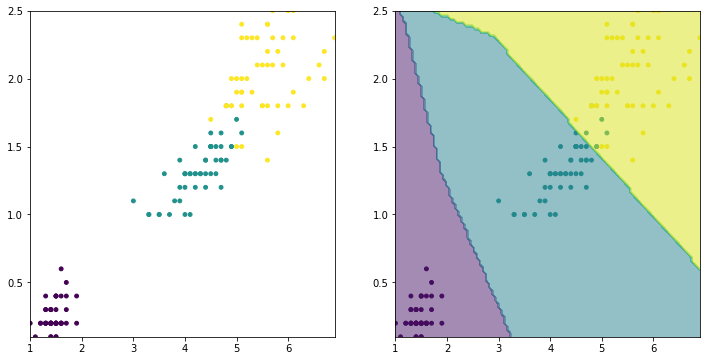

In [62]:
input_dim, output_dim = x.shape[1], y_onehot.shape[1]
#configuração da rede - problema de classificação multiclasse (binary_cross_entropy)
#o uso de lr decay fez a rede aprender mais rápido, 600 epochs atingiu > 96%
#nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 1e-1)
nn = NeuralNetwork(cost_func = rna.softmax_neg_log_likelihood, learning_rate = 1e-1,lr_decay_method = rna.exponential_decay, lr_decay_rate=1.0, lr_decay_steps=10)
#nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 1e-1,lr_decay_method = staircase_decay, lr_decay_rate=1.0, lr_decay_steps=10)
#nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 1e-1,lr_decay_method =  time_based_decay, lr_decay_rate=0.1, lr_decay_steps=10)
nn.layers.append(Layer(input_dim=input_dim, output_dim=5,activation=rna.relu)) # relu ou tanh 
nn.layers.append(Layer(input_dim=5, output_dim=output_dim,activation=rna.linear)) 
#porque 2000 epochs ? tentativa e erro !! e mais, sendo 150 o total do dataset, o dividimos em 15 lotes de 10 linhas
#nn.fit(x, y_onehot, epochs=2000, verbose=200) #porque 2000 epochs ? tentativa e erro !! 
nn.fit(x, y_onehot, epochs=2000, verbose=200,batch_gen= rna.batch_sequential, batch_size = 10) 
y_pred = np.argmax(nn.predict(x), axis=1)
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred)))

plot.classification_predictions(x, y, is_binary=False, nn=nn)

### Mapa Suscetibilidade POA

In [63]:
import os, sys
import pandas as pd
from sklearn.model_selection import train_test_split
APP_PATH = os.getcwd()
dataset = pd.read_csv(os.path.join(APP_PATH, os.path.join("data", "Input_POA.csv"))) #Input_POA  diabetes spc_data_landslides
dataset

,slope,aspect,elevation,uso_solo,lito,twi,curv,class
0,13.452180,127.04240,59.22540,2230,2741,6.376712,0.008905,0
1,15.656500,110.69380,203.50100,1320,2741,5.476123,0.065837,0
2,1.895332,215.47270,10.00250,2110,2790,10.594538,-0.020116,0
3,1.016567,39.76366,5.45029,1620,2790,10.741805,-0.003531,0
4,11.090160,178.25730,68.48230,1210,2742,7.579783,-0.000890,0
...,...,...,...,...,...,...,...,...
95,37.890990,336.34500,177.72200,2230,2773,6.217178,-0.021211,1
96,7.045130,99.54131,37.76530,1420,2742,9.468263,-0.018692,1
97,16.295700,216.57440,106.03300,2230,2773,9.182029,-0.015873,1
98,3.906067,50.09582,19.37700,2210,1507,7.014249,-0.000092,0


In [64]:
# split data into X and y
X = dataset.drop('class',axis=1)
Y= dataset['class']
#X

In [65]:
X = X.to_numpy()    #converte dataframe em array
Y = Y.to_numpy()    #converte dataframe em array
Y = Y.reshape(-1,1) #reorganiza o array em um array 1 x 1
print(X.shape, Y.shape)

(100, 7) (100, 1)


In [66]:
minmax = MinMaxScaler(feature_range=(-1, 1))
X = minmax.fit_transform(X.astype(np.float64))
print(X.min(axis=0), X.max(axis=0))

[-1. -1. -1. -1. -1. -1. -1.] [1. 1. 1. 1. 1. 1. 1.]


In [67]:
# split data into training and testing sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [68]:
input_dim, output_dim = X_train.shape[1], y_train.shape[1]

In [69]:
#configuração da rede - problema de classificação binária (binary_cross_entropy)
#nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate = 6*1e-1) # da Lucimara
nn = NeuralNetwork(cost_func = rna.binary_cross_entropy, learning_rate = 5e-3) # Tentativa e Erro - Caio

nn.layers.append(Layer(input_dim=input_dim, output_dim=4,activation= rna.tanh, weights_initializer=rna.glorot_normal)) # tanh tb serve leaky_relu ou relu ou elu
nn.layers.append(Layer(input_dim=4, output_dim=4,activation= rna.relu, weights_initializer=rna.glorot_normal,biases_initializer=rna.random_uniform)) # tanh tb serve leaky_relu ou relu ou elu
nn.layers.append(Layer(input_dim=4, output_dim=output_dim,activation=rna.sigmoid,weights_initializer=rna.glorot_uniform)) 

In [70]:
#nn.fit(X_train, y_train, epochs=200, verbose=20) # da Lucimara
nn.fit(X_train, y_train, epochs=18001, verbose=1000) 

epoch:    0/18001 loss_train: 0.95505353 + 0.00000000 = 0.95505353 loss_val = 0.95505353
epoch: 1000/18001 loss_train: 0.48757682 + 0.00000000 = 0.48757682 loss_val = 0.48757682
epoch: 2000/18001 loss_train: 0.34310159 + 0.00000000 = 0.34310159 loss_val = 0.34310159
epoch: 3000/18001 loss_train: 0.28943732 + 0.00000000 = 0.28943732 loss_val = 0.28943732
epoch: 4000/18001 loss_train: 0.26865750 + 0.00000000 = 0.26865750 loss_val = 0.26865750
epoch: 5000/18001 loss_train: 0.25902007 + 0.00000000 = 0.25902007 loss_val = 0.25902007
epoch: 6000/18001 loss_train: 0.25136609 + 0.00000000 = 0.25136609 loss_val = 0.25136609
epoch: 7000/18001 loss_train: 0.24466312 + 0.00000000 = 0.24466312 loss_val = 0.24466312
epoch: 8000/18001 loss_train: 0.23885206 + 0.00000000 = 0.23885206 loss_val = 0.23885206
epoch: 9000/18001 loss_train: 0.23387339 + 0.00000000 = 0.23387339 loss_val = 0.23387339
epoch: 10000/18001 loss_train: 0.22964682 + 0.00000000 = 0.22964682 loss_val = 0.22964682
epoch: 11000/18001 l

In [71]:
y_pred = nn.predict(X_test)
#print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y_test, y_pred > 0.5)))

Acurácia: 85.00%


In [72]:
nn.save('suscetibilidadeNN.pkl')

In [73]:
nn = None
nn

In [74]:
nn = NeuralNetwork.load('suscetibilidadeNN.pkl')
y_pred = nn.predict(X_test)

In [75]:
#print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y_test, y_pred > 0.5)))

Acurácia: 85.00%


### Early Stopping DEMO

In [76]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

x, y = make_regression(n_samples=100, n_features=1, n_informative=2, noise=10.0, random_state=42)
x,y = x.reshape(-1,1), y.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [77]:
nn = NeuralNetwork(cost_func=rna.mse, learning_rate= 1e-1, patience=10) #se não melhorar em 10 epochs parar !!
nn.layers.append(Layer(input_dim=x.shape[1], output_dim=y.shape[1],activation=rna.linear))
nn.fit(x_train,y_train,x_val=x_test, y_val=y_test, epochs=1000, verbose=50)

epoch:    0/1000 loss_train: 704.60080283 + 0.00000000 = 704.60080283 loss_val = 741.56921245
epoch:   50/1000 loss_train: 35.45009514 + 0.00000000 = 35.45009514 loss_val = 53.35381739
epoch:  100/1000 loss_train: 35.23224766 + 0.00000000 = 35.23224766 loss_val = 51.77164482
epoch:  150/1000 loss_train: 35.23214680 + 0.00000000 = 35.23214680 loss_val = 51.73728963
epoch:  200/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73653027
epoch:  250/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73651378
epoch:  300/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73651343
epoch:  350/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73651342
epoch:  400/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73651342
epoch:  450/1000 loss_train: 35.23214675 + 0.00000000 = 35.23214675 loss_val = 51.73651342


[[44.33503]]
[[-0.36343]]


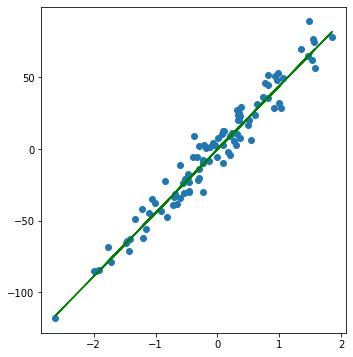

In [78]:
print(nn.layers[0].weights)
print(nn.layers[0].biases)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.plot(x, nn.predict(x), c='green')

# Referências

- [Tensorflow Playground](http://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.94880&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

- [Linear Classification](http://cs231n.github.io/linear-classify/)

__Regularization__:
- [Implementing Neural Network L1 Regularization](https://jamesmccaffrey.wordpress.com/2017/06/27/implementing-neural-network-l1-regularization/)
- [Implementing Neural Network L2 Regularization](https://jamesmccaffrey.wordpress.com/2017/06/29/implementing-neural-network-l2-regularization/)
- [Neural Network L2 Regularization Using Python](https://visualstudiomagazine.com/articles/2017/09/01/neural-network-l2.aspx)

__Momentum__:
- [Neural Network Momentum Using Python](https://visualstudiomagazine.com/articles/2017/08/01/neural-network-momentum.aspx)
- [Beyond SGD: Gradient Descent with Momentum and Adaptive Learning Rate](https://wiseodd.github.io/techblog/2016/06/22/nn-optimization/)

__Learning Rate Decay__:
- [Using Learning Rate Schedules for Deep Learning Models in Python with Keras](https://machinelearningmastery.com/using-learning-rate-schedules-deep-learning-models-python-keras/)
- [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1)
- [Tensorflow Exponential Decay Documentation](https://www.tensorflow.org/api_docs/python/tf/train/exponential_decay)

__Batch Normalization__:
- [Understanding the backward pass through Batch Normalization Layer](https://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html)
- [Deriving the Gradient for the Backward Pass of Batch Normalization](https://kevinzakka.github.io/2016/09/14/batch_normalization/)
- [Implementing BatchNorm in Neural Net](https://wiseodd.github.io/techblog/2016/07/04/batchnorm/)
- [What does the gradient flowing through batch normalization looks like ?](http://cthorey.github.io./backpropagation/)
- [GRADIENTS, BATCH NORMALIZATION AND LAYER NORMALIZATION](https://theneuralperspective.com/2016/10/27/gradient-topics/)

__Gradient Checking__:
- [cs231n](https://github.com/cs231n/cs231n.github.io/blob/master/neural-networks-3.md#gradcheck)
- [Gradient checking and advanced optimization](http://ufldl.stanford.edu/wiki/index.php/Gradient_checking_and_advanced_optimization)
- [BatchNormalization fails gradient checking](https://github.com/torch/nn/issues/744)